In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# O dataset foi retirado de P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
# 'Modeling wine preferences by data mining from physicochemical properties.' 
# In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

data = pd.read_csv('winequality-red.csv', sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df = data[['quality', 'alcohol', 'pH', 'sulphates', 'density', 'fixed acidity']]
df.columns = df.columns.str.strip()
df

,quality,alcohol,pH,sulphates,density,fixed acidity
0,5,9.4,3.51,0.56,0.99780,7.4
1,5,9.8,3.20,0.68,0.99680,7.8
2,5,9.8,3.26,0.65,0.99700,7.8
3,6,9.8,3.16,0.58,0.99800,11.2
4,5,9.4,3.51,0.56,0.99780,7.4
...,...,...,...,...,...,...
1594,5,10.5,3.45,0.58,0.99490,6.2
1595,6,11.2,3.52,0.76,0.99512,5.9
1596,6,11.0,3.42,0.75,0.99574,6.3
1597,5,10.2,3.57,0.71,0.99547,5.9


In [4]:
X = df[['alcohol', 'pH', 'sulphates', 'density', 'fixed acidity']]
y = df['quality']
X = sm.add_constant(X)
print(X)

      const  alcohol    pH  sulphates  density  fixed acidity
0       1.0      9.4  3.51       0.56  0.99780            7.4
1       1.0      9.8  3.20       0.68  0.99680            7.8
2       1.0      9.8  3.26       0.65  0.99700            7.8
3       1.0      9.8  3.16       0.58  0.99800           11.2
4       1.0      9.4  3.51       0.56  0.99780            7.4
...     ...      ...   ...        ...      ...            ...
1594    1.0     10.5  3.45       0.58  0.99490            6.2
1595    1.0     11.2  3.52       0.76  0.99512            5.9
1596    1.0     11.0  3.42       0.75  0.99574            6.3
1597    1.0     10.2  3.57       0.71  0.99547            5.9
1598    1.0     11.0  3.39       0.66  0.99549            6.0

[1599 rows x 6 columns]


In [5]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     130.8
Date:                Mon, 20 Jul 2020   Prob (F-statistic):          2.68e-116
Time:                        00:25:29   Log-Likelihood:                -1651.6
No. Observations:                1599   AIC:                             3315.
Df Residuals:                    1593   BIC:                             3347.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            60.5720     17.293      3.503      0.000      26.653      94.491
alcohol           0.3066      0.023     13.056      0.000       0.261       0.353
pH               -0.0909      0.178     -0.511      0.609      -0.440       0.258
sulphates         0.9300      0.106      8.768      0.000       0.722       1.138
density         -59.3849     17.602     -3.374      0.001     -93.911     -24.859
fixed acidity     0.0900      0.022      4.171      0.000       0.048       0.132
==============================================================================
Omnibus:                       47.801   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.226
Skew:                          -0.258   Prob(JB):                     1.03e-17
Kurtosis:                       3.953   Cond. No.                     2.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# Assumindo que o Vinho Tibetano tenha % álcool = 10, ph = 3.5, sulphates = 0.6, density = 0.99500 
# e fixed acidity = 7.0, qual seria sua qualidade?

b0, b1, b2, b3, b4, b5 = model.params
alc, ph, sulph, dens, fixacd = 10.0, 3.5, 0.6, 0.99500, 7.0

previsao = (b0 + (b1 * alc) + (b2 * ph) + (b3 * sulph) + (b4 * dens) + (b5 * fixacd))
print('A qualidade do Vinho Tibetano será {}.'.format(int(previsao)))

A qualidade do Vinho Tibetano será 5.


In [7]:
# Fazendo a matriz de correlação
df.corr(method='pearson')

,quality,alcohol,pH,sulphates,density,fixed acidity
quality,1.000000,0.476166,-0.057731,0.251397,-0.174919,0.124052
alcohol,0.476166,1.000000,0.205633,0.093595,-0.496180,-0.061668
pH,-0.057731,0.205633,1.000000,-0.196648,-0.341699,-0.682978
sulphates,0.251397,0.093595,-0.196648,1.000000,0.148506,0.183006
density,-0.174919,-0.496180,-0.341699,0.148506,1.000000,0.668047
fixed acidity,0.124052,-0.061668,-0.682978,0.183006,0.668047,1.000000


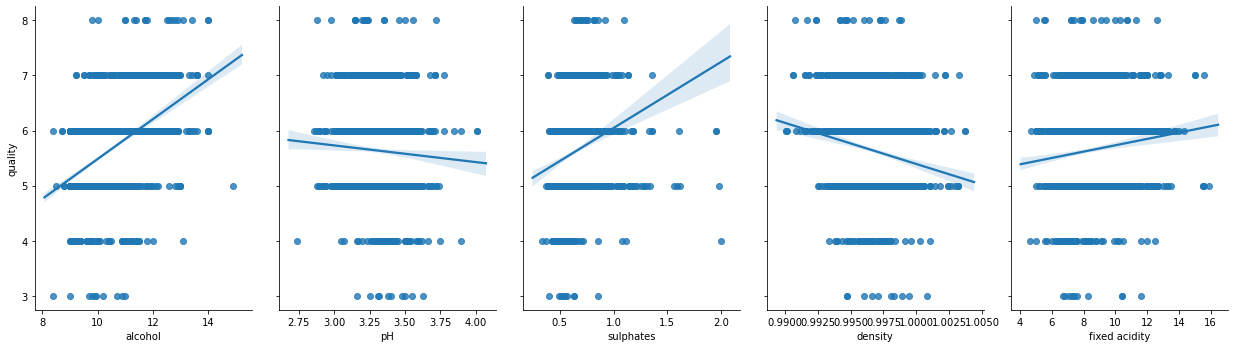

In [8]:
sns_plot = sns.pairplot(data, y_vars='quality', 
                        x_vars=['alcohol', 'pH', 'sulphates', 'density', 'fixed acidity'], 
                        height=5, aspect=0.7, kind='reg')
print(sns_plot)
#sns_plot.savefig("output.png")

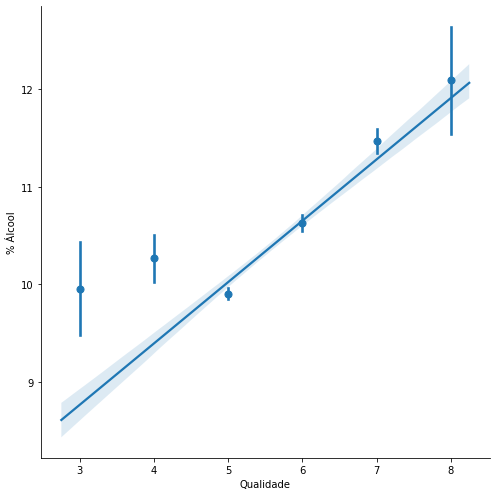

In [9]:
G1 = sns.lmplot(x='quality', y='alcohol', data = df, x_estimator=np.mean, height=7, ci=95)
G1.set_axis_labels('Qualidade', "% Álcool")
#G1.savefig("G1.png")

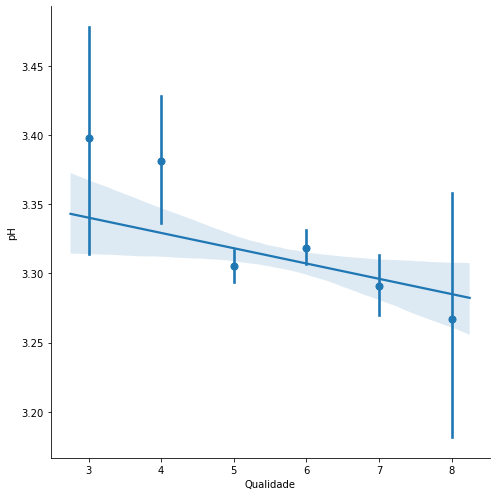

In [10]:
G2 = sns.lmplot(x='quality', y='pH', data = df, x_estimator=np.mean, height=7, ci=95)
G2.set_axis_labels('Qualidade', "pH")
#G2.savefig("G2.png")

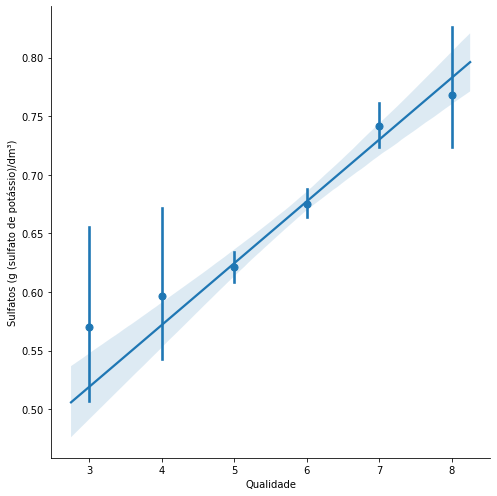

In [11]:
G3 = sns.lmplot(x='quality', y='sulphates', data = df, x_estimator=np.mean, height=7, ci=95)
G3.set_axis_labels('Qualidade', "Sulfatos (g (sulfato de potássio)/dm³)")
#G3.savefig("G3.png")

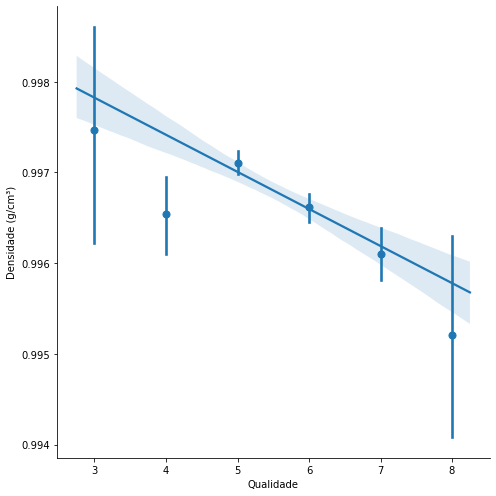

In [12]:
G4 = sns.lmplot(x='quality', y='density', data = df, x_estimator=np.mean, height=7, ci=95)
G4.set_axis_labels('Qualidade', "Densidade (g/cm³)")
#G4.savefig("G4.png")

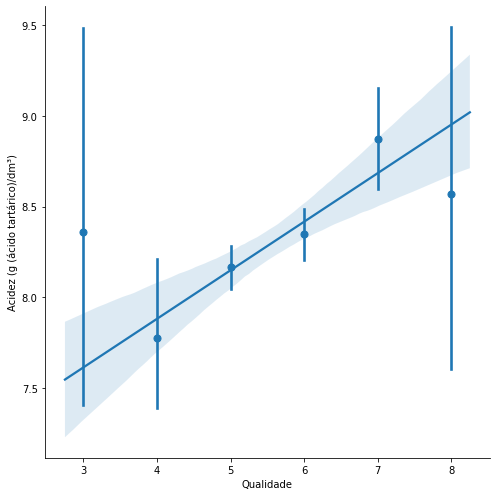

In [13]:
G5 = sns.lmplot(x='quality', y='fixed acidity', data = df, x_estimator=np.mean, height=7, ci=95)
G5.set_axis_labels('Qualidade', "Acidez (g (ácido tartárico)/dm³)")
#G5.savefig("G5.png")